In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#import Polynomial_Regression_using_polynomialFeatures as mp

In [23]:
data = pd.read_csv('student_scores.csv')
#print(data)

In [24]:
'''
#one method to split the data
Training_data = data.head(20)
Testing_data = data.tail(5)
#print("Training data : {}, Testing data : {}".format(Training_data, Testing_data))

#Create Hour training label
H_train = np.array(Training_data.drop(['Scores'], 1))
print(H_train)
#Create score training label
S_train = np.array(Training_data.drop(['Hours'], 1))
print(S_train)

#Create Hour testing data
H_test = np.array(Testing_data.drop(['Scores'], 1))
print(H_test)
#Create score testing label
S_test = np.array(Testing_data.drop(['Hours'], 1))
print(S_test)
'''
#another method for spliting the data
'''
Select algorithm based on data analysis
- Split training and testing data
- we will be using Linear regression as regression problem
- Tranining data 70%
- Testing data 30%
'''
#H_temp = data.drop(4,'index')
H_data = np.array(data.drop(['Scores'], 1))
S_data = np.array(data.drop(['Hours'], 1))

#print(H_temp)
H_train, H_test, S_train, S_test = train_test_split( H_data, S_data, test_size = 0.3 )
#print( H_train.shape, S_train.shape )
#print( H_test.shape, S_test.shape )

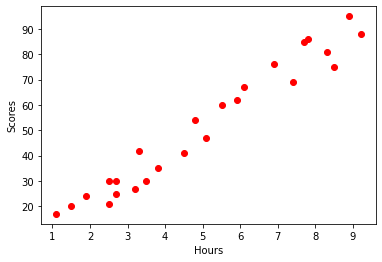

In [25]:
plt.scatter( data['Hours'], data['Scores'],color = 'red' )
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()


In [56]:
polynomial_equation = PolynomialFeatures(degree = 5)
#input_H_train = PolynomialFeatures.fit_transform(H_train)
#print(input_H_train)

polynomial_equation.fit(H_train)

input_H_train = polynomial_equation.transform(H_train)
print(polynomial_equation)
p = polynomial_equation.get_feature_names()
print(p)
Q = polynomial_equation.get_params()
print(Q)
transform_data = polynomial_equation.transform(H_train)
#print(transform_data[0])



input_H_test = polynomial_equation.transform(H_test)
print("Input of testing data : {}".format(input_H_test[0]))

PolynomialFeatures(degree=5)
['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5']
{'degree': 5, 'include_bias': True, 'interaction_only': False, 'order': 'C'}
Input of testing data : [  1.        2.7       7.29     19.683    53.1441  143.48907]


In [57]:
# Apply Linear Regression
reg = LinearRegression()
model = reg.fit(input_H_train, S_train)

In [58]:
#get linear regression coefficients
slope = reg.coef_
intercept = reg.intercept_
print("Slope : {}, Intercept : {}".format(slope, intercept))

Slope : [[ 0.00000000e+00  3.70020069e+01 -1.92081286e+01  4.91770926e+00
  -5.13772771e-01  1.84517159e-02]], Intercept : [-5.96512018]


In [59]:
#Scores predicted = slope(m) * x(height) + b(intercept)......(Testing)
#print(S_train)
#print(input_H_train)
def my_prediction(x,y,m,b):
    predicted_train= np.zeros(y.shape)
    
    for i in range(len((x))):
        for j in range(len(x[i])):
            predicted_train[i] += (m[0][j] * x[i][j]) 
        predicted_train[i]  += b
    return predicted_train

a= my_prediction(input_H_train,S_train,slope,intercept)
b= my_prediction(input_H_test,S_test,slope,intercept)

#print("training data : {} testing data : {}".format(a,b))



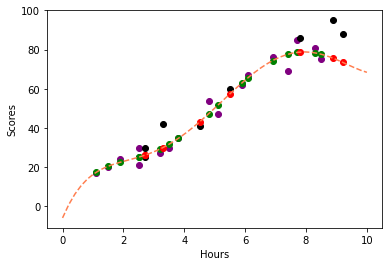

In [60]:

xvals = np.linspace(0,10, 50)
xvals_transform = np.array([xvals]).reshape(50, 1)
#print(xvals_transform)
input_xval = polynomial_equation.fit_transform(xvals_transform)
yvals = my_prediction(input_xval, xvals_transform, slope, intercept )

plt.scatter(H_train, S_train, color = 'purple')
plt.scatter(H_test, S_test, color = 'black')

plt.xlabel('Hours')
plt.ylabel('Scores')

plt.scatter(H_train,a, color = 'green')
plt.scatter(H_test,b, color = 'red')

plt.plot(xvals, yvals , color = 'coral', linestyle = 'dashed')
plt.show()

In [63]:
a = reg.score(input_H_test,S_test)
b = reg.score(input_H_train,S_train)
print("Testing data : {},Training data : {}".format(a,b))


Testing data : 0.851463068002368,Training data : 0.9728584996767119
